##### 1.- Graficación para la apriori frecuentista 
##### 2.- Tratamiento de la Bernoulli-Beta, con s(x) suficiente
##### 3.- Obtener MAP para la Poisson-Gamma

# Uno

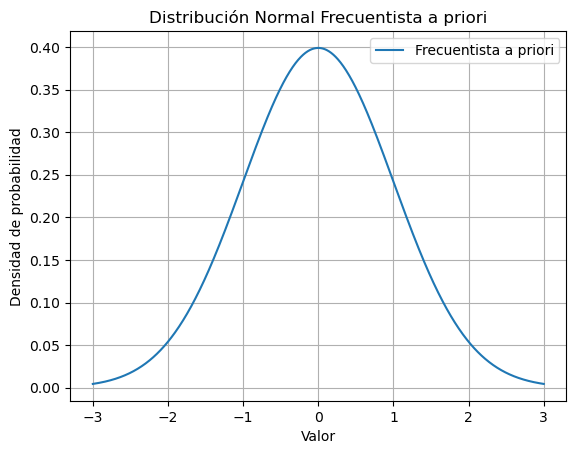

In [1]:
# Importar bibliotecas
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Definir la media y la desviación estándar muestral
mu = 0  # reemplazar con la media observada
sigma = 1  # reemplazar con la desviación estándar observada

# Generar valores para la variable x
x = np.linspace(mu - 3*sigma, mu + 3*sigma, 1000)

# Graficar la distribución normal
plt.plot(x, norm.pdf(x, mu, sigma), label='Frecuentista a priori')
plt.title('Distribución Normal Frecuentista a priori')
plt.xlabel('Valor')
plt.ylabel('Densidad de probabilidad')
plt.legend()
plt.grid(True)
plt.show()

# Dos

### Racional

En un modelo de Bernoulli, el parámetro de interés es la probabilidad de éxito `p`. La distribución Beta es la conjugada a priori para la distribución de Bernoulli, lo que significa que la posterior también es una distribución Beta. Si tenemos un conjunto de datos $ X = \{x_1, x_2, ..., x_n\} $ donde cada $ x_i $ es una variable binaria indicando éxito (1) o fracaso (0), el estadístico suficiente para `p` es la suma total de éxitos, denotado por $ s(x) = \sum_{i=1}^{n} x_i $.

Dada una distribución a priori $ Beta(\alpha_{prior}, \beta_{prior}) $, después de observar los datos, los parámetros de la distribución a posteriori se actualizan de la siguiente manera:

$$\alpha_{posterior} = \alpha_{prior} + s(x)$$
$$\beta_{posterior} = \beta_{prior} + n - s(x)$$

Donde:
- $ \alpha_{prior} $ y $ \beta_{prior} $ son los parámetros de forma de la distribución Beta a priori.
- $ n $ es el número total de ensayos.

La distribución a posteriori resultante es $ Beta(\alpha_{posterior}, \beta_{posterior}) $.

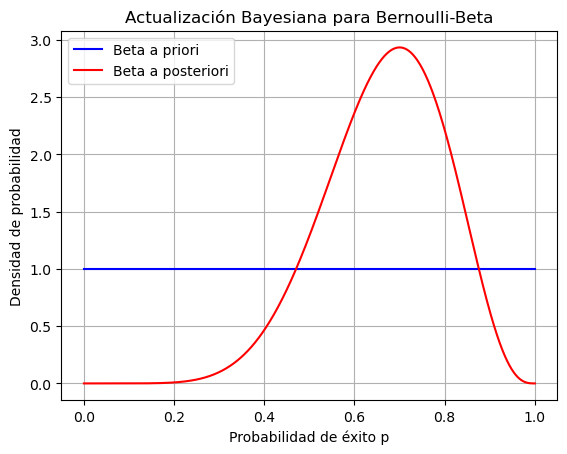

In [2]:
# Importar bibliotecas
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import beta

# Establecer los parámetros a priori de la distribución Beta
alpha_prior = 1  # hiperparámetro alpha
beta_prior = 1   # hiperparámetro beta

# Simular n observaciones de una variable aleatoria de Bernoulli
n = 10  # número total de ensayos
s_x = 7  # número de éxitos

# Actualizar los parámetros a posteriori de la distribución Beta
alpha_post = alpha_prior + s_x
beta_post = beta_prior + n - s_x

# Generar valores para la variable x
x = np.linspace(0, 1, 1000)

# Graficar la distribución Beta a priori y a posteriori
plt.plot(x, beta.pdf(x, alpha_prior, beta_prior), 'b-', label='Beta a priori')
plt.plot(x, beta.pdf(x, alpha_post, beta_post), 'r-', label='Beta a posteriori')
plt.title('Actualización Bayesiana para Bernoulli-Beta')
plt.xlabel('Probabilidad de éxito p')
plt.ylabel('Densidad de probabilidad')
plt.legend()
plt.grid(True)
plt.show()

# Tres

#### Racional

En un modelo Poisson, estamos interesados en estimar la tasa $ \lambda $, que es el número esperado de eventos en un intervalo fijo. La distribución Gamma es la conjugada a priori para la tasa de un proceso de Poisson. Esto significa que la distribución a posteriori para $ \lambda $ después de observar los datos sigue siendo una distribución Gamma.

Si observamos un conjunto de datos $X = \{x_1, x_2, ..., x_n\}$ de un proceso de Poisson, la función de verosimilitud es proporcional a $\lambda^{\sum x_i} e^{-n\lambda}$, donde $\sum x_i$ es la suma de los eventos observados (es decir, el estadístico suficiente para $\lambda $) y $n$ es el número de intervalos observados o el tamaño de la muestra.

Dada una distribución a priori $Gamma(\alpha_{prior}, \beta_{prior})$, los parámetros de la distribución a posteriori Gamma se actualizan a:

$$\alpha_{posterior} = \alpha_{prior} + \sum x_i$$
$$\beta_{posterior} = \beta_{prior} + n$$

El estimador MAP para $ \lambda $ bajo la distribución a posteriori Gamma se calcula como:

$$\text{MAP} = \frac{\alpha_{posterior} - 1}{\beta_{posterior}}$$

Donde:
- $ \alpha_{prior} $ y $ \beta_{prior} $ son los parámetros de la distribución Gamma a priori.
- $ \alpha_{posterior} $ y $ \beta_{posterior} $ son los parámetros actualizados después de la observación de los datos.

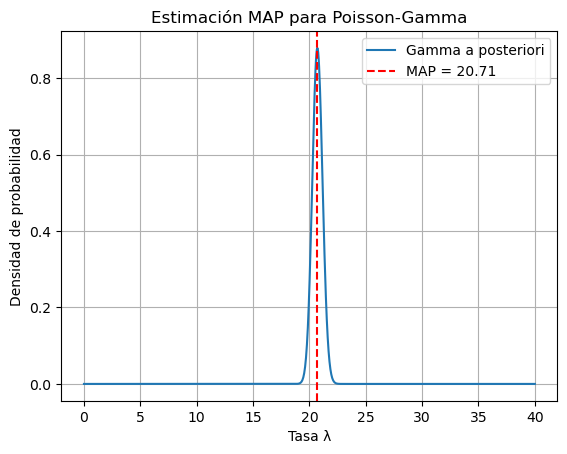

In [3]:
# Importar bibliotecas
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gamma, poisson

# Parámetros de la distribución a priori Gamma
alpha_prior = 9  # hiperparámetro alpha
beta_prior = 0.5 # hiperparámetro beta

# Simular datos de una distribución de Poisson
lambda_verdadero = 20  # Valor verdadero de la tasa de eventos lambda
datos = poisson.rvs(mu=lambda_verdadero, size=100)

# Actualizar los parámetros a posteriori Gamma
alpha_post = alpha_prior + np.sum(datos)
beta_post = beta_prior + len(datos)

# Calcular MAP para la tasa de Poisson
map_estimate = (alpha_post - 1) / beta_post

# Visualizar la densidad a posteriori y el MAP
x = np.linspace(0, 40, 1000)
plt.plot(x, gamma.pdf(x, alpha_post, scale=1/beta_post), label='Gamma a posteriori')
plt.axvline(map_estimate, color='red', linestyle='--', label=f'MAP = {map_estimate:.2f}')
plt.title('Estimación MAP para Poisson-Gamma')
plt.xlabel('Tasa λ')
plt.ylabel('Densidad de probabilidad')
plt.legend()
plt.grid(True)
plt.show()